**PRATIMA CHINTA, CODEVITA INTERNSHIP- DATA SCIENCE**

SUBMITTED ON: 27/07/2022 

TASK: **To predict weight of a person based on their height using Linear Regression.** 


Linear regression quantifies the relationship between one or more predictor variable(s) and one outcome variable. Linear regression is commonly used for predictive analysis and modeling. For example, it can be used to quantify the relative impacts of age, gender, and diet (the predictor variables) on height (the outcome variable).

Linear Regression can be considered a Machine Learning algorithm that allows us to map numeric inputs to numeric outputs, fitting a line into the data points.Linear Regression as an algorithm relies on the concept of lowering the cost to maximize the performance. 

**Step 1: Load Dataset**

In [ ]:
# Step 1 - Load data
import pandas as pd
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/weight-height.csv")

In [ ]:
#Checking sample rows
dataset.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


**Step 2: Analyze Data**
The dataset contains 3 columns namely 'Gender', 'Height' and 'Weight'.
Height is in inches and weight is in pounds.

In [ ]:
#This method returns the output as shown below. It basically shows the number of entries, the column names and the column types. 
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [ ]:
#Checking count, mean and other descriptors for numerical columns
#The describe method displays basic statistical information on the numerical values of the dataset like mean, standard deviation, percentile, min and max.
dataset.describe()


,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [ ]:
#Checking for null values: list of number of null values in each column
dataset.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

Step 3: Selecting X and y for input and output variables and converting them to Array for easier calculation before using ML model

In [ ]:
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, 2].values

Step 4: Convert Gender to number: Convert all categorical values (text values) to numerical , in this case convert gender variable to 0 for male and 1 for female.

We use LabelEncoder for this step:

In [ ]:
# Using LabelEncoder  
from sklearn.preprocessing import LabelEncoder
labelEncoder_gender =  LabelEncoder()
X[:,0] = labelEncoder_gender.fit_transform(X[:,0])

# Optional - if you want to convert X to float data type
import numpy as np
X = np.vstack(X[:, :]).astype(np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
X[:5] #sample inputs

array([[ 1.        , 73.84701702],
       [ 1.        , 68.78190405],
       [ 1.        , 74.11010539],
       [ 1.        , 71.7309784 ],
       [ 1.        , 69.88179586]])

Step 4: Split dataset into training set and test set
We will use 80% of the data for training and 20% of the data for testing.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Step 5: Fit Regression Model
Using LinearRegression to train our model.

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Step 6: Predict test set values

In [ ]:
lrpred = lr.predict(X_test)

Let’s compare the predicted values (lin_pred) with the actual values (y_test). We can see that our model did a fairly good job.

In [ ]:
lrpred[:10]

array([141.93828842, 176.55658781, 219.77836195, 148.83188401,
       162.0920759 , 105.84706638, 142.40537439, 134.34505435,
       184.01021005, 196.05450515])

In [ ]:
y_test[:10]

array([138.0857961 , 187.36336585, 216.53319128, 131.76144282,
       157.71843843,  98.51607861, 149.63194856, 133.515492  ,
       188.05333309, 210.1988449 ])

Step 7: Model Evaluation

In [ ]:
from sklearn import metrics
print('R square = ',metrics.r2_score(y_test, lrpred))
print('Mean squared Error = ',metrics.mean_squared_error(y_test, lrpred))
print('Mean absolute Error = ',metrics.mean_absolute_error(y_test, lrpred))

R square =  0.9052889824534557
Mean squared Error =  97.87152220196164
Mean absolute Error =  7.955916525326745


In [ ]:
my_weight_pred = lr.predict([[1,65]])
print('My predicted weight = ',my_weight_pred)

My predicted weight =  [163.00852086]


**VISUALISATION**

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
# Preparing X and y from the given data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weight-height.csv')
dt = df.to_numpy()

X = dt[1:, 1].astype('float64')
y = dt[1:, 2].astype('float')

In [ ]:
X[:5]

array([68.78190405, 74.11010539, 71.7309784 , 69.88179586, 67.25301569])

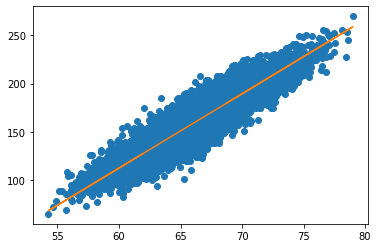

In [ ]:
m, b = np.polyfit(X, y, 1)
plt.plot(X, y, 'o')
#create scatter plot

plt.plot(X, m*X + b)